<a href="https://colab.research.google.com/github/shirleyrutgers/DataVis/blob/main/PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PS4

 1. may want to use some extra fancy stu like advanced matplotlib or plotly
 2. BUT even more important to have solid story (just with basic mpl); again: idea and story matter most and simplicity rst
 3. id say this is key ps; we already did plenty and you should have a good command, but yet we still have couple weeks to go so
 you still can x it up and or beef it up; i ll go carefully through it and let you know where we stand.

 Comments>


https://colab.research.google.com/github/shirleyrutgers/DataVis/blob/main/PS3.ipynb

1. awesome to look at the literature

2. great that you sorted from lo to hi, as per our rules maximize meaning

https://www.bls.gov/cew/about-data/location-quotients-explained.htm

3. looks pretty solid, good progress

per proximity: yes!
The First Law of Geography, formulated by Waldo Tobler, states that "everything is related to everything else, but near things are more related than distant things".
so like cumberland like salem; and essex like morris etc

https://colab.research.google.com/github/shirleyrutgers/DataVis/blob/main/PS3.ipynb#scrollTo=uhAM0cKeZWux&line=10&uniqifier=1
--we did it in class early on with data management, there are better ways than one by one

4. the LQ doesnt look right! have to actually calculate it by taking the ratios as shown in
https://www.bls.gov/cew/about-data/location-quotients-explained.htm


##Research Topic, Research Question, Hypothesis and Variables

**Research Topic:**  
The Relationship Between County GDP, Industry Structure, and Business Formation in New Jersey  

**Research Question:**  
Do counties in New Jersey with higher GDP levels and stronger private industry presence show greater levels of business formation?  

**Hypothesis:**  
Counties with higher GDP and stronger concentrations of private-sector employment—measured by Location Quotients (LQ)—will have a higher number of business applications. Additionally, areas with stronger performance in key sectors like education and health services may also support more entrepreneurship, while counties with lower private-sector presence may benefit from targeted support.  

**Key Variables:**  
- **Business Applications (BA2023):** Dependent variable – represents entrepreneurship activity  
- **Gross Domestic Product (GDP):** Independent variable – shows overall economic strength  
- **GDP per Capita:** Economic capacity per person  
- **Unemployment Rate:** Indicator of economic stress  
- **Median Income:** Control for income levels  
- **Location Quotient – Total Private Industry (LQ):** Measures private-sector concentration vs. national average  
- **Location Quotient – Education & Health Services:** Shows specialization in a key industry with potential for business growth  

This study uses multiple datasets to explore how economic conditions, sector strength, and income levels influence business formation, helping identify counties that could benefit most from entrepreneurship support programs.

#Literature Review

## Literature review
Why having employment and unemployment?

I included both employment and unemployment to capture both the size of the active workforce and the proportion of it that is not engaged in economic activity, which could affect business formation.
Following, we can see evidence of this argument.

### What influences business formation?
(business formation GDP)
It's important to review data about the industry concentration across the country. Location Quotient variable is the metric I will use to compare the business concentration across the states. Because the impact of the level of Gross Domestic Product per capita or level of income per County is not very significant, we seek to add a new variable as a proxy for these indicators, new variable Location quotient.

In the database we have the variables LQ> Employment Location Quotient Relative to U.S. and Total Wage Location Quotient Relative to U.S. The explanation> If an LQ is equal to 1, then the industry has the same share of its area employment (or total wage) as it does in the nation. An LQ greater than 1 indicates an industry with a greater share of the local area employment (or wages) than is the case nationwide. For example, Bergen 1.05 Employment Location Quotient Relative to U.S.

### Relationship between GDP and entrepreneurship?
(entrepreneurship regional economic growth)
This pattern is consistent with prior studies linking regional GDP to entrepreneurial activity (e.g., Acs et al., 2008; Glaeser et al., 2010).

Sources>
https://www.researchgate.net/publication/5158481_Entrepreneurship_Economic_Development_and_Institutions

https://www.journals.uchicago.edu/doi/full/10.1086/674023?utm_source=chatgpt.com


### Also factor in business deaths
This analysis focuses on business applications but does not include business closures, which would give a more complete picture of net entrepreneurship.

The relationship between Gross Domestic Product (GDP) and unemployment is a widely studied topic in economics. "Okun’s Law" states that insufficient economic growth is generally associated with rising unemployment. This implies that regions with lower GDP may experience higher levels of unemployment, which can lead individuals to seek alternatives such as starting their own businesses. (Source: Federal Reserve Bank of St. Louis)
https://www.stlouisfed.org/on-the-economy/2012/may/the-relationships-among-changes-in-gdp-employment-and-unemployment-this-time-its-different?utm_source=chatgpt.com


In the context of New Jersey, it is essential to promote job creation and support entrepreneurship initiatives, especially in areas with high unemployment rates. To achieve this, workforce development programs focused on entrepreneurial skills can be implemented. For example, the "New Jersey Small Business Development Center (NJSBDC)" offers counseling and workshops for entrepreneurs and small businesses across the state.
https://njsbdc.com/annual-reports/


Additionally, the SkillUp NJ program provides free access to over 5,000 online courses in high-demand sectors such as information technology, business analysis, and project management. (Sources: NJSBDC, NJ.gov)
https://www.nj.gov/labor/career-services/education-training/skillup-nj/?utm_source=chatgpt.com

Finally, The APEX Accelerator program helps small businesses that want to work with the government. It offers free support like training, counseling, and help with bids to win local, state, or federal contracts. In New Jersey, APEX helps new and growing businesses understand how to sell their products or services to the government and become more competitive.
https://www.njit.edu/apex/
Partnership with Rutgers University>
https://njcern.rutgers.edu/resources/njit-procurement-technical-assistance-center-ptac/?utm_source=chatgpt.com



By investing in these training programs, New Jersey residents can be equipped with the necessary tools to launch and manage successful businesses, contributing to lower unemployment and strengthening the local economy.



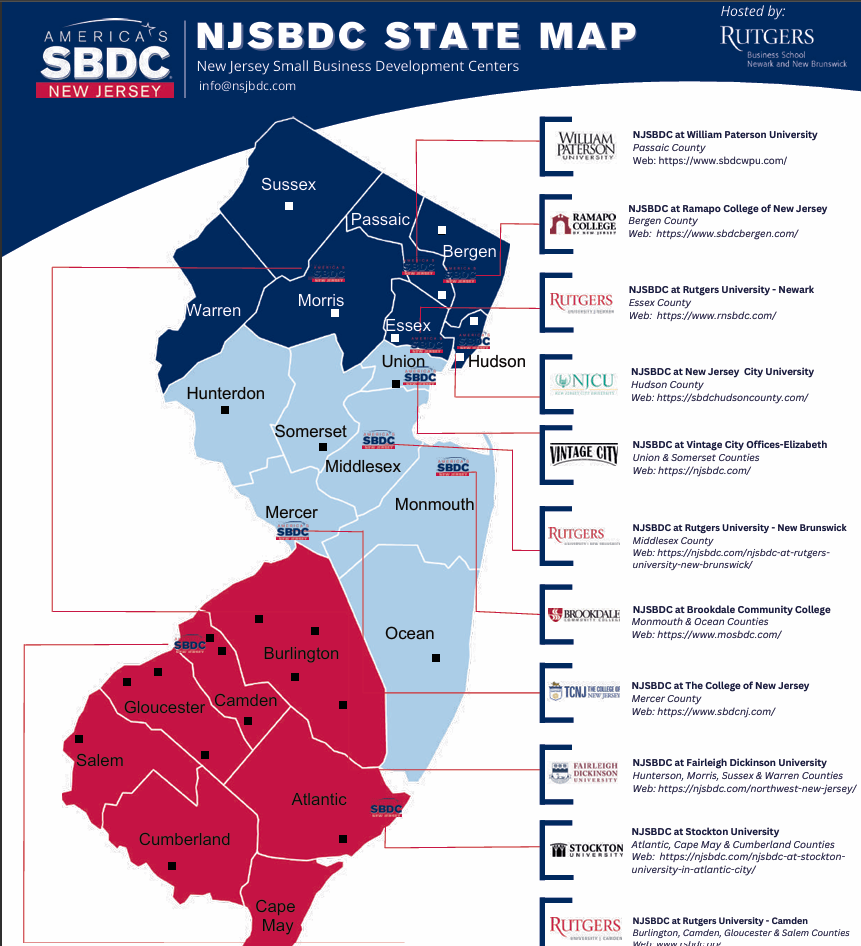

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
plt.style.use('default') # more delicate subtle than classic
#plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

Step 1. Download file from online and save in colab

Data

NJ data, population, gdp https://docs.google.com/spreadsheets/d/e/2PACX-1vRCnEjufrgpP0UB0Quxx8nYC56Yw0C7ZuWMDjPj9H8BrUF8hPGSPBpmcGlJKc0xhA/pub?gid=2071317397&single=true&output=csv

NJ business applications https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv

NJ wage https://docs.google.com/spreadsheets/d/e/2PACX-1vS8byZhwUGPcnozsRjz2WuI2lUIi84AweOFjg1lM0lSLpEzRQhK-NNBZdKZK9XoEw/pub?gid=69402389&single=true&output=csv

Location Quotient
https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pub?gid=2115564207&single=true&output=csv


#Dataset> create dataframes

In [ ]:
df1=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRCnEjufrgpP0UB0Quxx8nYC56Yw0C7ZuWMDjPj9H8BrUF8hPGSPBpmcGlJKc0xhA/pub?gid=2071317397&single=true&output=csv')
df2=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSzhIWXDHIusT7myBctQLeKRlPvg7V7YVIweyIMU7W3I3NKX2UjTMNKPA995O1JTQ/pub?gid=1018220772&single=true&output=csv')
df3=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS8byZhwUGPcnozsRjz2WuI2lUIi84AweOFjg1lM0lSLpEzRQhK-NNBZdKZK9XoEw/pub?gid=69402389&single=true&output=csv')
df4=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pub?gid=2115564207&single=true&output=csv')

<ipython-input-7-7541d776bfd5>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df4=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQT8hHjiM5ankNj3q3xblbotJdzpRqiZvY--AWgiGlZrSfki9T0M6kJdFZV6A5Q6A/pub?gid=2115564207&single=true&output=csv')


In [ ]:
# Rename the column
df4 = df4.rename(columns={"Area": "County"})

# Remove everything from the space before the comma onward, and also remove ' County'
df4["County"] = df4["County"].str.replace(r"\s*,.*", "", regex=True) \
                             .str.replace(" County", "", regex=False)

In [30]:
# Filter df4 for New Jersey, Private Ownership, and Total Industry, excluding undefined areas
df4_filtered = df4[
    (df4["Area Type"] == "County") &
    (df4["St Name"] == "New Jersey") &
    (df4["Ownership"] == "Private") &
    (df4["Industry"] == "10 Total, all industries") &
    (df4["County"] != "Unknown Or Undefined, New Jersey")
]

# Display the filtered results
df4_filtered.head()


,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,County,Ownership,Industry,Annual Average Status Code,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31851,34001,34,1.0,5,10,2023,A,County,New Jersey,Atlantic,Private,"10 Total, all industries",NaN,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
31869,34003,34,3.0,5,10,2023,A,County,New Jersey,Bergen,Private,"10 Total, all industries",NaN,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
31887,34005,34,5.0,5,10,2023,A,County,New Jersey,Burlington,Private,"10 Total, all industries",NaN,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
31905,34007,34,7.0,5,10,2023,A,County,New Jersey,Camden,Private,"10 Total, all industries",NaN,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
31923,34009,34,9.0,5,10,2023,A,County,New Jersey,Cape May,Private,"10 Total, all industries",NaN,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89


In [ ]:
df4_table = df4_filtered[[
    "County",
    "Annual Average Establishment Count",
    "Annual Average Employment",
    "Annual Total Wages",
    "Annual Average Weekly Wage",
    "Annual Average Pay",
    "Employment Location Quotient Relative to U.S.",
    "Total Wage Location Quotient Relative to U.S."
]]

# Mostrar la tabla
df4_table.head()

,County,Annual Average Establishment Count,Annual Average Employment,Annual Total Wages,Annual Average Weekly Wage,Annual Average Pay,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
31851,Atlantic,"6,911","105,030","5,692,663,077","1,042","54,200",0.98,0.92
31869,Bergen,"35,098","392,497","31,115,189,292","1,525","79,275",1.05,1.05
31887,Burlington,"11,926","183,809","12,681,241,373","1,327","68,992",1.03,1.02
31905,Camden,"13,387","176,138","11,421,783,386","1,247","64,845",1.01,0.98
31923,Cape May,"3,877","34,725","1,535,183,337",850,"44,209",0.96,0.89


In [32]:
import plotly.express as px

fig = px.scatter(
    df4_table,
    x='Employment Location Quotient Relative to U.S.',
    y='Total Wage Location Quotient Relative to U.S.',
    hover_name='County',
    hover_data={
        'County': False,  # Ya está en hover_name
        'Annual Average Establishment Count': True,
        'Annual Average Employment': True,
        'Annual Total Wages': True,
        'Annual Average Weekly Wage': True,
        'Annual Average Pay': True,
        'Employment Location Quotient Relative to U.S.': True,
        'Total Wage Location Quotient Relative to U.S.': True
    },
    size_max=10,
    opacity=0.7
)

fig.update_layout(
    title="Location Quotients: Employment vs Total Wages (Interactive)",
    xaxis_title="Employment Location Quotient Relative to U.S.",
    yaxis_title="Total Wage Location Quotient Relative to U.S.",
    template="plotly_white"
)

fig.show()


(0.8, 1.3)

(0.8, 1.3)

Text(0.98, 0.9400000000000001, 'Atlantic')

Text(1.05, 1.07, 'Bergen')

Text(1.03, 1.04, 'Burlington')

Text(1.01, 1.0, 'Camden')

Text(0.96, 0.91, 'Cape May')

Text(0.98, 0.96, 'Cumberland')

Text(0.93, 0.93, 'Essex')

Text(0.99, 0.97, 'Gloucester')

Text(1.0, 1.04, 'Hudson')

Text(1.01, 1.03, 'Hunterdon')

Text(0.83, 0.89, 'Mercer')

Text(1.02, 1.03, 'Middlesex')

Text(1.04, 1.04, 'Monmouth')

Text(1.06, 1.09, 'Morris')

Text(1.01, 0.98, 'Ocean')

Text(0.99, 0.97, 'Passaic')

Text(0.97, 1.0, 'Salem')

Text(1.07, 1.11, 'Somerset')

Text(0.96, 0.9500000000000001, 'Sussex')

Text(1.02, 1.04, 'Union')

Text(1.0, 1.0, 'Warren')

Text(1.16, 1.17, 'Unknown Or Undefined')

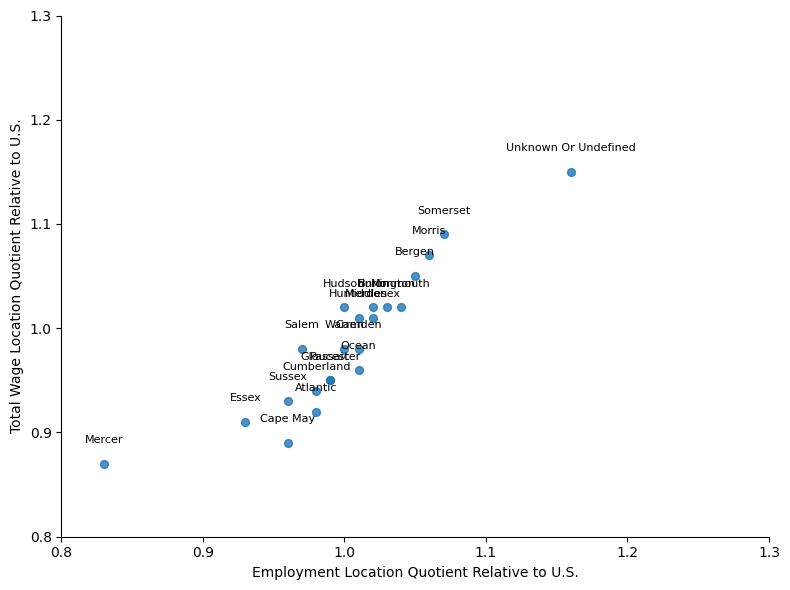

In [26]:
from matplotlib import pyplot as plt

# Create scatter plot
ax = df4_table.plot(
    kind='scatter',
    x='Employment Location Quotient Relative to U.S.',
    y='Total Wage Location Quotient Relative to U.S.',
    s=32,
    alpha=.8,
    figsize=(8, 6)
)

# Expand axis limits for better spacing
plt.xlim(0.8, 1.3)
plt.ylim(0.8, 1.3)

# Add county labels with spacing
for i, row in df4_table.iterrows():
    plt.text(row['Employment Location Quotient Relative to U.S.'],
             row['Total Wage Location Quotient Relative to U.S.'] + 0.02,
             row['County'], fontsize=8, ha='center')

# Clean up plot
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()


Text(0.98, 0.9500000000000001, 'Atlantic')

Text(1.05, 1.08, 'Bergen')

Text(1.03, 1.05, 'Burlington')

Text(1.01, 1.01, 'Camden')

Text(0.96, 0.92, 'Cape May')

Text(0.98, 0.97, 'Cumberland')

Text(0.93, 0.9400000000000001, 'Essex')

Text(0.99, 0.98, 'Gloucester')

Text(1.0, 1.05, 'Hudson')

Text(1.01, 1.04, 'Hunterdon')

Text(0.83, 0.9, 'Mercer')

Text(1.02, 1.04, 'Middlesex')

Text(1.04, 1.05, 'Monmouth')

Text(1.06, 1.1, 'Morris')

Text(1.01, 0.99, 'Ocean')

Text(0.99, 0.98, 'Passaic')

Text(0.97, 1.01, 'Salem')

Text(1.07, 1.12, 'Somerset')

Text(0.96, 0.9600000000000001, 'Sussex')

Text(1.02, 1.05, 'Union')

Text(1.0, 1.01, 'Warren')

Text(1.16, 1.18, 'Unknown Or Undefined')

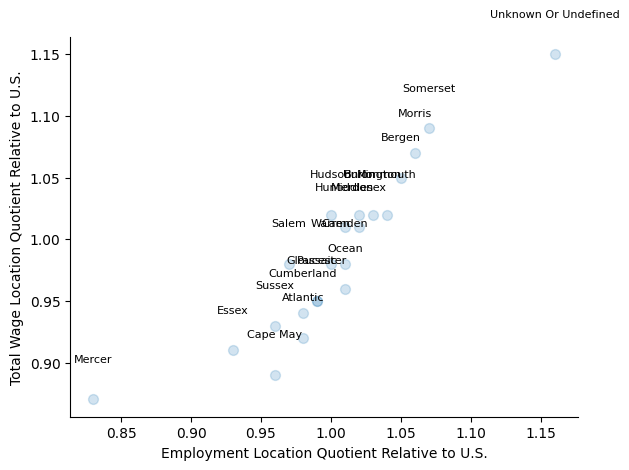

In [22]:
# Employment Location Quotient Relative to U.S. vs Total Wage Location Quotient Relative to U.S.

#from matplotlib import pyplot as plt
#df4_table.plot(kind='scatter', x='Employment Location Quotient Relative to U.S.', y='Total Wage Location Quotient Relative to U.S.', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt

ax = df4_table.plot(kind='scatter', x='Employment Location Quotient Relative to U.S.', y='Total Wage Location Quotient Relative to U.S.', s=50, alpha=.20)

# Add county labels
for i, row in df4_table.iterrows():
    plt.text(row['Employment Location Quotient Relative to U.S.'], row['Total Wage Location Quotient Relative to U.S.']+ 0.03, row['County'], fontsize=8, ha='center')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()